### Ex : matrix print

In [14]:
# extract data from array

from scipy import *
from numpy import *

V1=array([1,2,4,5])
print(V1)

M1=array([[1,complex(2,0),3],[3,4,5],[0,9,2]])
print('\n M1=',M1)

dd=M1[:,1]
print('\n dd=',dd)


[1 2 4 5]

 M1= [[1.+0.j 2.+0.j 3.+0.j]
 [3.+0.j 4.+0.j 5.+0.j]
 [0.+0.j 9.+0.j 2.+0.j]]

 dd= [2.+0.j 4.+0.j 9.+0.j]


### Ex: inverse of matrix

In [8]:
from scipy import *
from numpy import *

# Taking a 3 * 3 matrix
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])

# Calculating the inverse of the matrix
print(np.linalg.inv(A))

[[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


### Ex: Eigenvalues of A

In [9]:
from scipy import *
from numpy import *

M1=np.random.random((3, 3))

ee=linalg.eigvals(M1)
print('\n ee=',ee)


 ee= [ 1.61946694 -0.17571737  0.411499  ]


### Ex: SVD of a matrix

In [13]:
from scipy import *
from numpy import *
from scipy.linalg import svd

M1=np.random.random((5, 5))

U, s, VT = svd(A)
print(U)

[[-0.3311453   0.55170698  0.76548168]
 [-0.35046108  0.68130752 -0.6426485 ]
 [-0.87608209 -0.48108156 -0.03225997]]


### Ex : Data visualization-random curve and fill

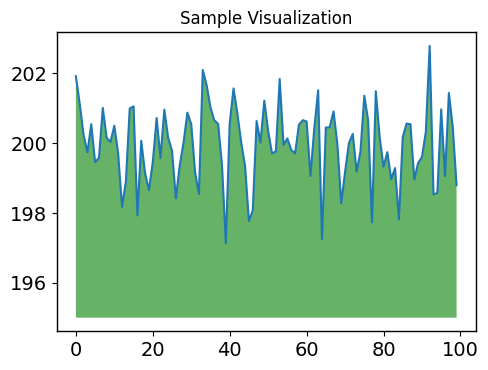

In [15]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

### Ex : Ball falling under gravity

[[  10.    ]
 [  10.    ]
 [   9.7275]
 [   9.1825]
 [   8.365 ]
 [   7.275 ]
 [   5.9125]
 [   4.2775]
 [   2.37  ]
 [   0.19  ]
 [  -2.2625]
 [  -4.9875]
 [  -7.985 ]
 [ -11.255 ]
 [ -14.7975]
 [ -18.6125]
 [ -22.7   ]
 [ -27.06  ]
 [ -31.6925]
 [ -36.5975]
 [ -41.775 ]
 [ -47.225 ]
 [ -52.9475]
 [ -58.9425]
 [ -65.21  ]
 [ -71.75  ]
 [ -78.5625]
 [ -85.6475]
 [ -93.005 ]
 [-100.635 ]
 [-108.5375]]
[  10.         9.86375    9.455      8.77375    7.82       6.59375
    5.095      3.32375    1.28      -1.03625   -3.625     -6.48625
   -9.62     -13.02625  -16.705    -20.65625  -24.88     -29.37625
  -34.145    -39.18625  -44.5      -50.08625  -55.945    -62.07625
  -68.48     -75.15625  -82.105    -89.32625  -96.82    -104.58625
 -112.625  ]


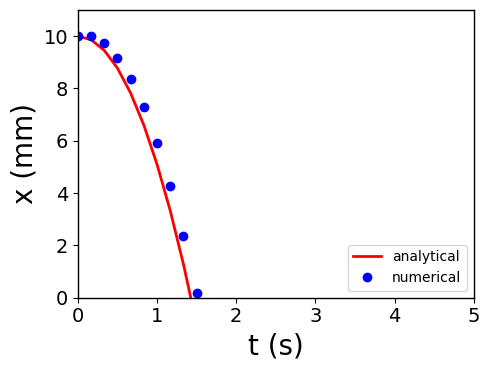

In [6]:
import numpy as np
import statistics
from scipy.linalg import solve
from matplotlib import pyplot as plt

t_max = 5;
n_max = 31;
#np = n_max;
h = 10;
g = -9.81;
v_ini=0;

t_domain = np.linspace(0, t_max, n_max)
res = [t_domain[i + 1] - t_domain[i] for i in range(len(t_domain)-1)]
dt = statistics.mean(res)

#rhs side
b=np.zeros((n_max,1))

b=(g*dt*dt)+b
b[0,0]=h
b[1,0]=v_ini*dt


#lhs side
A=np.zeros((n_max,n_max))
for i in range(2,n_max):
  A[i,i-2]=1;
  A[i,i-1]=-2;
  A[i,i]=1;

A[0,0]=1;
A[1,0]=-1;
A[1,1]=1;


X = np.linalg.inv(A).dot(b)
X_A=h+0.5*g*(np.square(t_domain))+v_ini*t_domain

print(X)
print(X_A)

plt.rcParams["figure.figsize"] = [5,3.8]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.linewidth'] = 1
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

h1, =plt.plot(t_domain,X_A,'r-',linewidth=2,label="analytical")
h2, =plt.plot(t_domain,X,'bo',linewidth=2,label="numerical")

plt.xlabel('t (s)',fontsize=20)
plt.ylabel('x (mm)',fontsize=20)

plt.xlim(0,t_max)
plt.ylim(0,1.1*h)
plt.margins(x=0, y=0)

#
first_legend = plt.legend(handles=[h1,h2], loc='lower right')
plt.show()

### Ex : spring-mass-damper system

(101, 101)


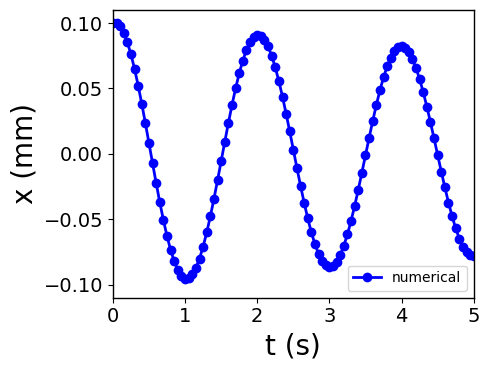

In [17]:
import numpy as np
import statistics
from scipy.linalg import solve
from matplotlib import pyplot as plt

t_max = 5;
n_max = 101;

m=1; c=0.1; k=10;

h = 0.1;
v_ini=0;

t_domain = np.linspace(0, t_max, n_max)
res = [t_domain[i + 1] - t_domain[i] for i in range(len(t_domain)-1)]
dt = statistics.mean(res)

#lhs side
A1=np.zeros((n_max,n_max));
A2=np.zeros((n_max,n_max));
A3=np.zeros((n_max,n_max));

for i in range(2,n_max):
  A1[i,i-2]=1;
  A1[i,i-1]=-2;
  A1[i,i]=1;
  A2[i,i-2]=-1;
  A2[i,i]=1;
  A3[i,i-1]=1;

# Bcs for whole matrix
A=(m/(dt*dt))*A1+(c/(2*dt))*A2+k*A3;
print(np.shape(A))

A[0,0]=1;
A[1,0]=-1;
A[1,1]=1;


#rhs side
b=np.zeros((n_max,1))

b[0,0]=h
b[1,0]=v_ini*dt
#

X = np.linalg.inv(A).dot(b)
#X_A=

#print(X)
#print(X_A)

plt.rcParams["figure.figsize"] = [5,3.8]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.linewidth'] = 1
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

#h1, =plt.plot(t_domain,X_A,'r-',linewidth=2,label="analytical")
h2, =plt.plot(t_domain,X,'bo-',linewidth=2,label="numerical")

plt.xlabel('t (s)',fontsize=20)
plt.ylabel('x (mm)',fontsize=20)

plt.xlim(0,t_max)
plt.ylim(-1.1*h,1.1*h)
plt.margins(x=0, y=0)

#
first_legend = plt.legend(handles=[h2], loc='lower right')
plt.show()

### Ex: Spring-mass-damper with forcing

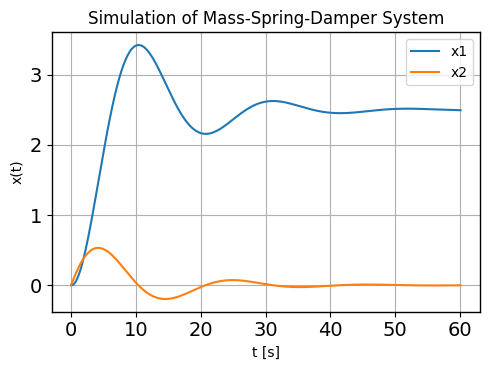

In [18]:
# Simulation of Mass-Spring-Damper System
import numpy as np
import matplotlib.pyplot as plt


# Model Parameters
c = 4 # Damping constant
k = 2 # Stiffness of the spring
m = 20 # Mass
F = 5 # Force


# Simulation Parameters
Ts = 0.1
Tstart = 0
Tstop = 60


N = int((Tstop-Tstart)/Ts) # Simulation length
x1 = np.zeros(N+2)
x2 = np.zeros(N+2)


x1[0] = 0 # Initial Position
x2[0] = 0 # Initial Speed


a11 = 1
a12 = Ts
a21 = -(Ts*k)/m
a22 = 1 - (Ts*c)/m
b1 = 0
b2 = Ts/m


# Simulation
for k in range(N+1):
  x1[k+1] = a11 * x1[k] + a12 * x2[k] + b1 * F
  x2[k+1] = a21 * x1[k] + a22 * x2[k] + b2 * F

# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)


#plt.plot(t, x1, t, x2)
plt.plot(t,x1)
plt.plot(t,x2)
plt.title('Simulation of Mass-Spring-Damper System')
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.grid()
plt.legend(["x1", "x2"])
plt.show()

### Ex: Spring-mass-damper with direct integration

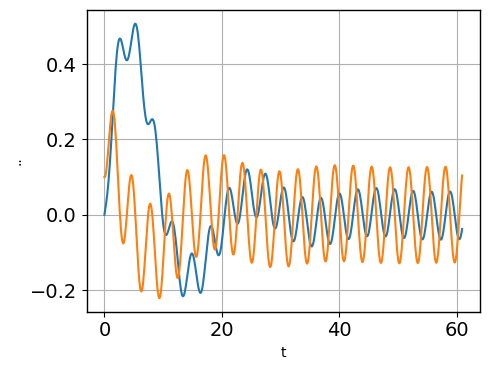

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

tstart=0.0
tend=60.0

incre=0.1
t=np.arange(tstart,tend+1,incre)

# initial condition
a=0
b=0.1
x_init=[a,b]

def smdiff(x,t):
  c=4
  k=2
  m=20
  w=2
  F=5*np.sin(w*t)


  dx1dt=x[1]
  dx2dt=(F-c*x[1]-k*x[0])/m

  dxdt =[dx1dt,dx2dt]
  return dxdt

x=odeint(smdiff,x_init,t)
x1=x[:,0]
x2=x[:,1]

plt.plot(t,x1)
plt.plot(t,x2)

plt.xlabel('t')
plt.ylabel('..')
plt.grid()
plt.show()

### Laplace equation solution

Please wait for a moment
Iteration finished


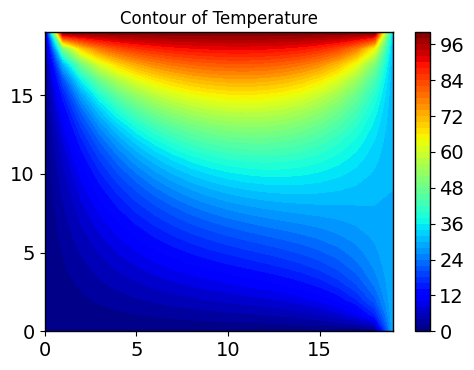

In [20]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method
import numpy as np
import matplotlib.pyplot as plt

# Set maximum iteration
maxIter = 500

# Set Dimension and delta
lenX = lenY = 20 #we set it rectangular
delta = 1

# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 30

# Initial guess of interior grid
Tguess = 30

# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# Iteration (We assume that the iteration is convergence in maxIter = 500)
print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished")


# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")